In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pandas as pd
import os

In [26]:
rng = np.random.default_rng(7)

In [27]:
means = np.array([[2, 3], [5, 6], [8, 1], [15, 4]], dtype=float)
stds  = np.array([[0.8, 2.5], [1.2, 1.9], [0.9, 0.9], [0.5, 2.0]], dtype=float)
n_per_class = 100

In [28]:
X_list, y_list = [], []
for k, (m, s) in enumerate(zip(means, stds)):
    Xk = rng.normal(m, s, (n_per_class, 2))
    yk = np.full(n_per_class, k, dtype=int)
    X_list.append(Xk)
    y_list.append(yk)
X = np.vstack(X_list)
y = np.hstack(y_list)

In [29]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,2.000984,3.746864,0
1,1.780690,0.773520,0
2,1.636263,0.520884,0
3,2.048115,6.350538,0
4,1.606235,1.448813,0


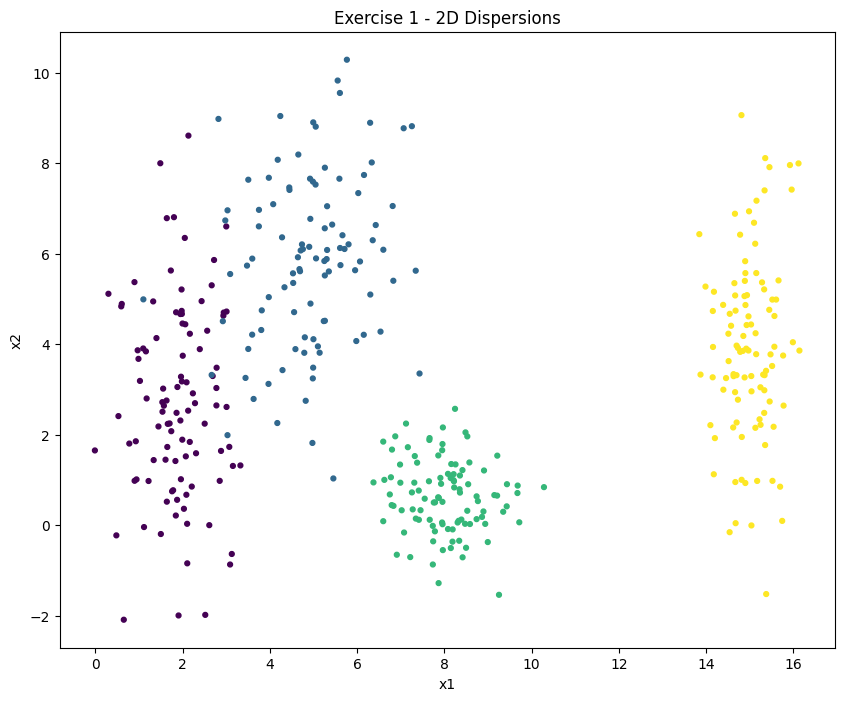

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Exercise 1 - 2D Dispersions')
plt.savefig(os.path.join('images', 'exercise1.png'), dpi=160, bbox_inches='tight')
plt.show()


In [31]:
clf_lin = LogisticRegression(max_iter=2000, n_jobs=None)
clf_lin.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [32]:
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300),
)
Z_lin = clf_lin.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

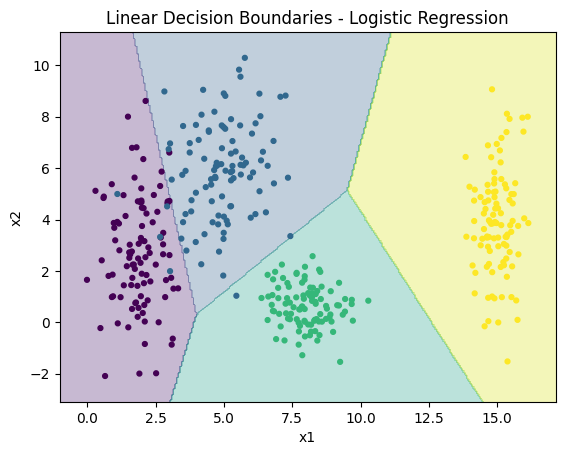

In [33]:
plt.figure()
plt.contourf(xx, yy, Z_lin, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=12)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linear Decision Boundaries - Logistic Regression")
lin_path = os.path.join('images', 'ex1_linear_regions.png')
plt.savefig(lin_path, dpi=160, bbox_inches="tight")
plt.show()

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), activation="tanh", max_iter=5000, random_state=7)
mlp.fit(X, y)

,hidden_layer_sizes,"(8, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,5000
,shuffle,True
,random_state,7


In [35]:
Z_mlp = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

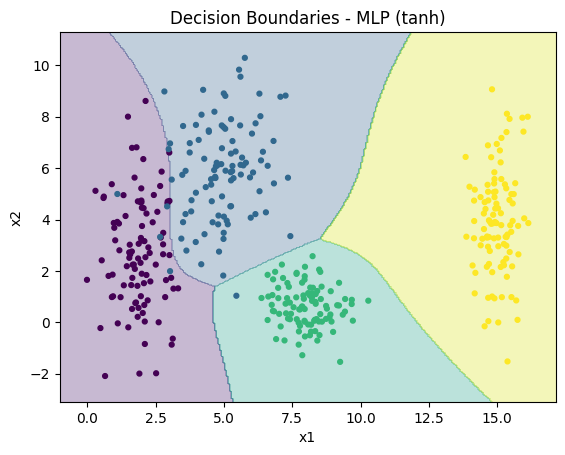

In [36]:
plt.figure()
plt.contourf(xx, yy, Z_mlp, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=12)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundaries - MLP (tanh)")
mlp_path = os.path.join("images", "ex1_mlp_regions.png")
plt.savefig(mlp_path, dpi=160, bbox_inches="tight")
plt.show()